

(sup_class_ex:data)=

## Data Exploring and Processing

Here we'll do two essential things. 
1. Process the data.
2. Analyze the data.

Processing will involve importing, cleaning, and sorting raw data; preparing it to be analyzed. Exploring the data builds an understanding of it and the problem you're trying to solve, equipping you to choose a machine-learning application.       

Before doing anything with raw data, you must import it.

In [1]:
# We'll import libraries as needed, but when submitting, 
# it's best to have them all at the top.
import pandas as pd

# Load this well-worn dataset:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
df = pd.read_csv(url) #read CSV into Python as a DataFrame
df # displays the DataFrame



,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


Oops. The first row of data has been set as headers. Some data sets have headers already -this one doesn't. How do we fix that? Google ["how to python add headers to dataframe"](https://www.google.com/search?q=how+to+python+add+headers+to+dataframe&rlz=1C1GCEA_enUS995US997&ei=7TuSY7TmGsyJggfflr3YCg&ved=0ahUKEwj0kK_X4er7AhXMhOAKHV9LD6sQ4dUDCA8&uact=5&oq=how+to+python+add+headers+to+dataframe&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIGCAAQCBAeMgUIABCGAzIFCAAQhgMyBQgAEIYDMgUIABCGAzoKCAAQRxDWBBCwAzoHCAAQgAQQDToICAAQCBAeEA06CAgAEAgQBxAeSgQIQRgASgQIRhgAULgCWMkIYMEfaAFwAXgAgAFPiAH1A5IBATeYAQCgAQHIAQjAAQE&sclient=gws-wiz-serp). You'll need to learn a lot of micro-skills -pick them up when needed. Reading up on the data set, [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set), we name the columns:

In [2]:
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'type']
df = pd.read_csv(url, names = column_names) #read CSV into Python as a DataFrame
df # displays the DataFrame

,sepal-length,sepal-width,petal-length,petal-width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


```{alarm}
**Your data doesn't look like this?** Different data might need different code. Don't *paste and pray*; adjust what you do according to what you have and need.    
```

Supervised methods use "answers" in the data to supervise the model. Does our data contain the "answers"? If we want to predict the Iris 'type,' then yes. It's the only categorical feature, so we'll go with it. However, a supervised method could predict *any* of the features, e.g., 'sepal-length.' A supervised method can't predict what it doesn't have, say, plant height or petal color. 

```{margin}
What? That's it for data processing? We didn't do much becasue the data didn't need much. Like a lot of data out there, it was (mostly) ready to go. No minimal processing is required. The project's needs determine the required data processing, i.e., if it works, you've done enough. See [Data Requirements](task2c:data_requirements). 
```

That's all the processing needed for now. 

(sup_class_ex:descriptive_methods_and_visualizations)=

### Descriptive Methods and Visualizations

Let's explore the data. A good starting question: how many different Iris categories do we have?

In [3]:
num_types = df.groupby(by='type').size();
display(num_types); 

type
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

(sup_class_ex:descriptive:visuals)=
Let's *visualize* that.
<!-- NOTE: Alt text for Python generated images added using Jupyter notebook cell's "img alt": "A bar plot is displayed. The x-axis are the type categories, and the y-axis is the number in the categories. Three bars Iris-setosa (red), Iris-versicolor (blue), and Iris-virginica (green) are each equal to 50",
     "output_type": "display_data"-->

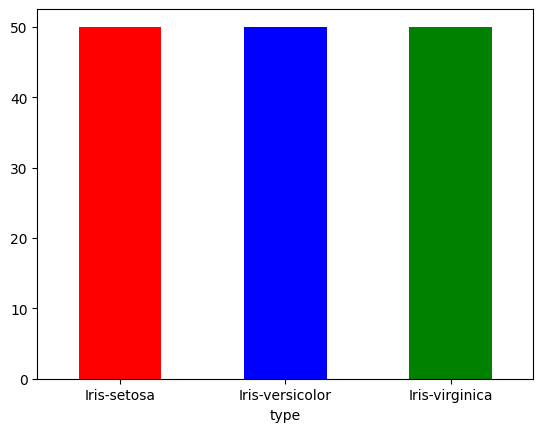

In [4]:
num_types.plot.bar(color=['red','blue','green'],rot=0);

```{margin}
Want to do something similar but different? Go to the [libary's docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html). You'll see lots of libraries and functions with lots of options. Don't just copy, paste, and pray. Read the docs and understand the parameters.
```

Three evenly distributed categories. What about the distribution of the petal widths? As with most things in nature, we might expect it to be somewhat normal.

(sup_class_ex:descriptive:visuals:histograms)=

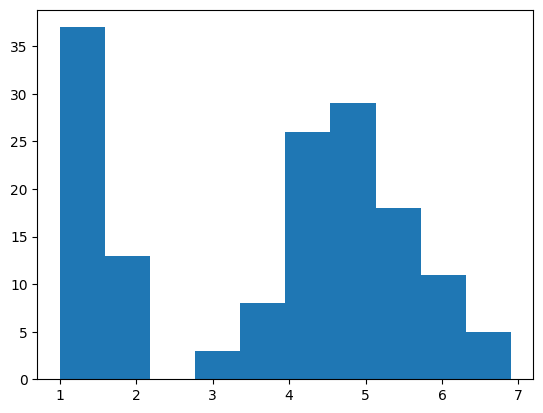

In [5]:
hist_petal_lengths = df['petal-length'].hist(grid = False,bins=10)

Not so normal. However, we are looking at the petal lengths of all three types. So let's look at a single type.

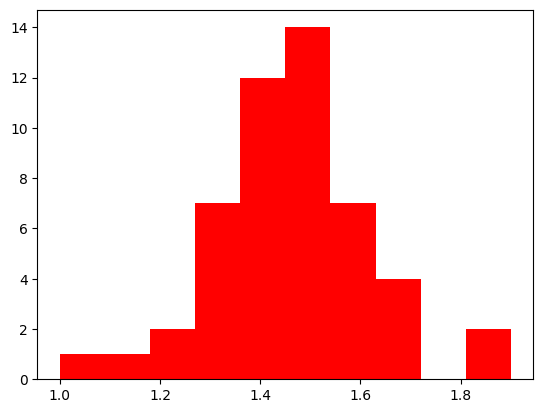

In [6]:
df_typeA = df[df['type'] == 'Iris-setosa']
df_typeA['petal-length'].hist(grid = False, color = 'red');

They don't assess aesthetics, but Pandas' visualizations are limited compared to others. Below we get a much better picture of what's going on, and we can clearly see the three different types.

A **bar plot** to visualize distributions:

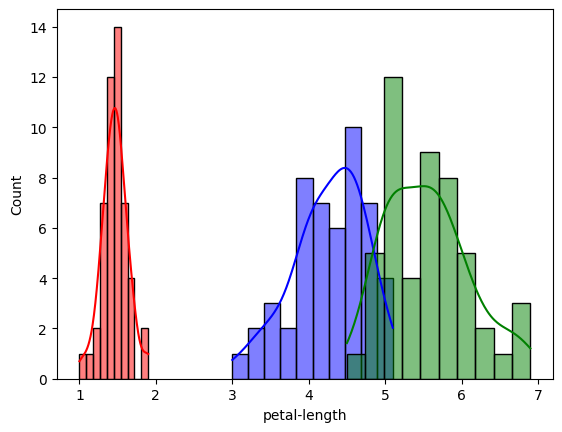

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

A = df[df['type'] == 'Iris-setosa']['petal-length']
B = df[df['type'] == 'Iris-versicolor']['petal-length']
C = df[df['type'] == 'Iris-virginica']['petal-length']

sns.histplot(A, color = 'red', kde=True, bins = 10)
sns.histplot(B, color ='blue', kde=True, bins = 10)
sns.histplot(C, color = 'green', kde=True, bins = 10)
plt.show()

A **scatterplot** to visualize correlations: 

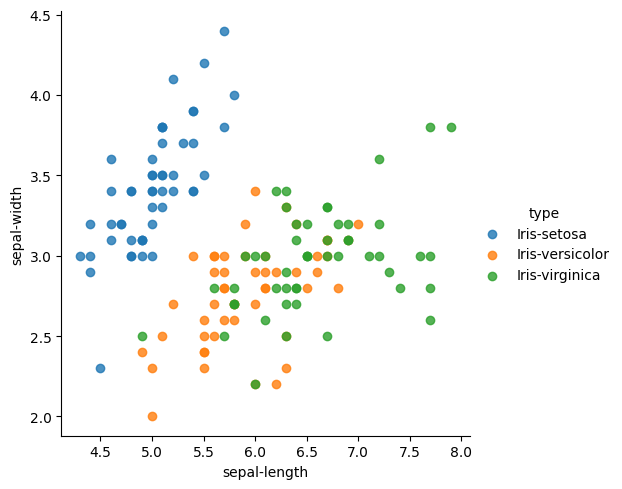

In [8]:
sns.lmplot(x='sepal-length', y='sepal-width', data=df, fit_reg=False, hue='type')
# Move the legend to an empty part of the plot
#plt.legend(loc='lower right')
plt.show()

A **correlogram** to visualize distributions and correlations of and between multiple variables.

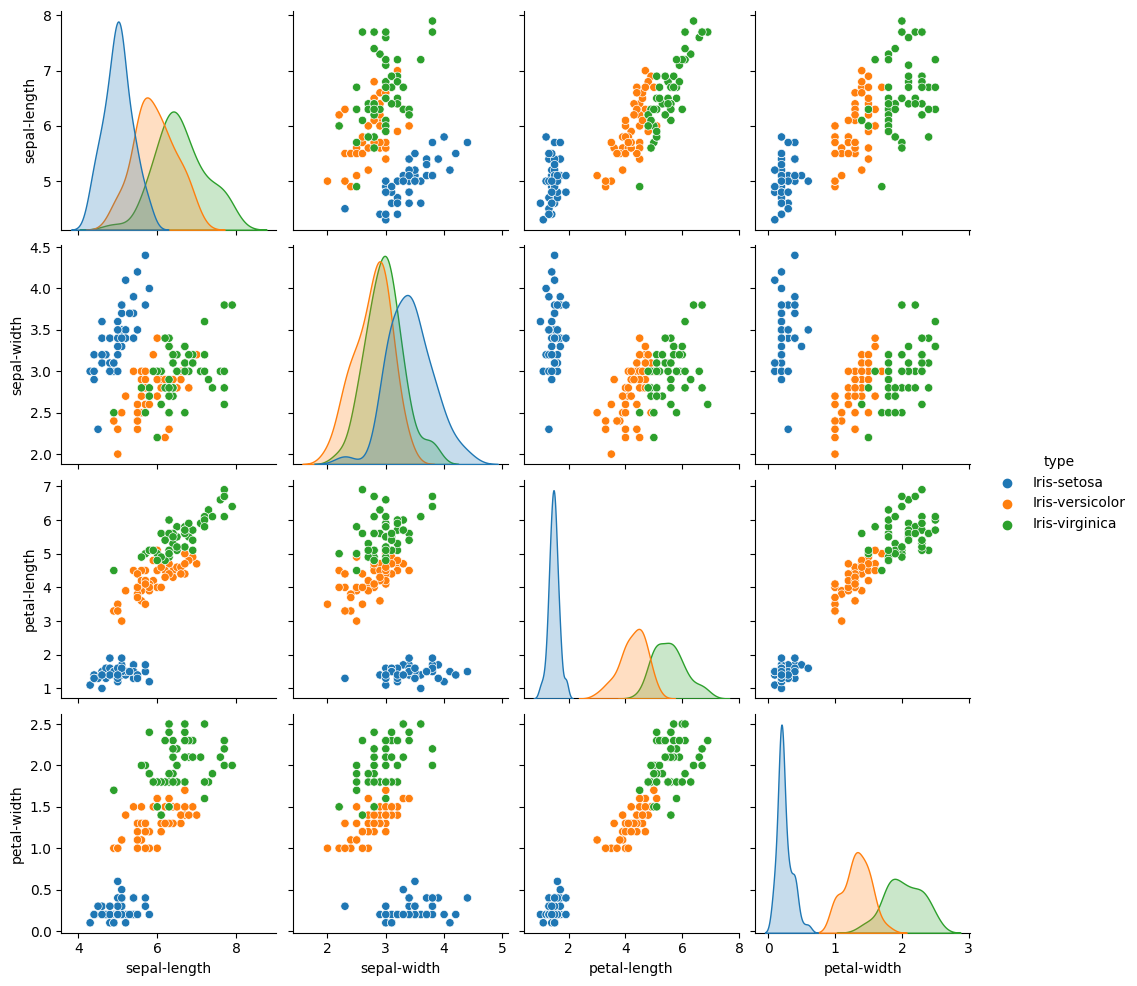

In [9]:
#correlogram
sns.pairplot(df, hue='type')
plt.show()

Each image is a descriptive method *and* a visualization ($\geq3$ meets the requirements). And here are some non-visual descriptions of the data:

In [10]:
df.describe(include='all')

,sepal-length,sepal-width,petal-length,petal-width,type
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Play around -*explore*. 